In [29]:
# First step, import libraries.
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt

In [30]:
df = pd.read_csv('bitcoin-historical-data/coinbaseUSD_1-min_data_2014-12-01_to_2018-11-11.csv')

In [31]:
df['date'] = pd.to_datetime(df['Timestamp'],unit='s').dt.date # for throwing away the hours/minutes/seconds

In [32]:
# group prices by day, and take the mean
group = df.groupby('date')
Real_Price = group['Weighted_Price'].mean()
#Real_Price # now I have, for each day, the mean of the bitcoin value

In [33]:
# split data, I want to predict the price for the last 30 days
prediction_days = 30
df_train= Real_Price[:len(Real_Price)-prediction_days]
df_test= Real_Price[len(Real_Price)-prediction_days:]

In [34]:
#I feature scale the data and reshape it since I want to use Keras
# Data preprocess
training_set = df_train.values # array of prices
training_set = np.reshape(training_set, (len(training_set), 1)) #reshaping, so now I have a (1378, 1) shape
training_set

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set) # scale the training set

X_train = training_set[0:len(training_set)-1] # removed the last day
Y_train = training_set[1:len(training_set)] # shift of one day to right
X_train = np.reshape(X_train, (len(X_train), 1, 1))

In [35]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Initialising the RNN
model = Sequential()

# Adding the input layer and the LSTM layer
model.add(LSTM(units = 4, activation = 'tanh', input_shape = (None, 1)))

# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, Y_train, batch_size = 5, epochs = 15)

Epoch 1/15
1377/1377 [==============================] - 1s 871us/step - loss: 0.0261
Epoch 2/15
1377/1377 [==============================] - 0s 346us/step - loss: 0.0110
Epoch 3/15
1377/1377 [==============================] - 0s 349us/step - loss: 0.0016
Epoch 4/15
1377/1377 [==============================] - 0s 349us/step - loss: 1.8928e-04
Epoch 5/15
1377/1377 [==============================] - 0s 351us/step - loss: 1.6453e-04
Epoch 6/15
1377/1377 [==============================] - 0s 349us/step - loss: 1.6142e-04
Epoch 7/15
1377/1377 [==============================] - 0s 350us/step - loss: 1.5809e-04
Epoch 8/15
1377/1377 [==============================] - 0s 348us/step - loss: 1.5993e-04
Epoch 9/15
1377/1377 [==============================] - 0s 351us/step - loss: 1.5717e-04
Epoch 10/15
1377/1377 [==============================] - 0s 350us/step - loss: 1.5776e-04
Epoch 11/15
1377/1377 [==============================] - 0s 351us/step - loss: 1.5470e-04
Epoch 12/15
1377/1377 [========

In [36]:
# Making the predictions
test_set = df_test.values # the last 30 days to predict
inputs = np.reshape(test_set, (len(test_set), 1)) # reshape
inputs = sc.transform(inputs) # normalize
inputs = np.reshape(inputs, (len(inputs), 1, 1)) # reshape

predicted_BTC_price = model.predict(inputs) # predict prices
predicted_BTC_price = sc.inverse_transform(predicted_BTC_price) # convert back values into real prices

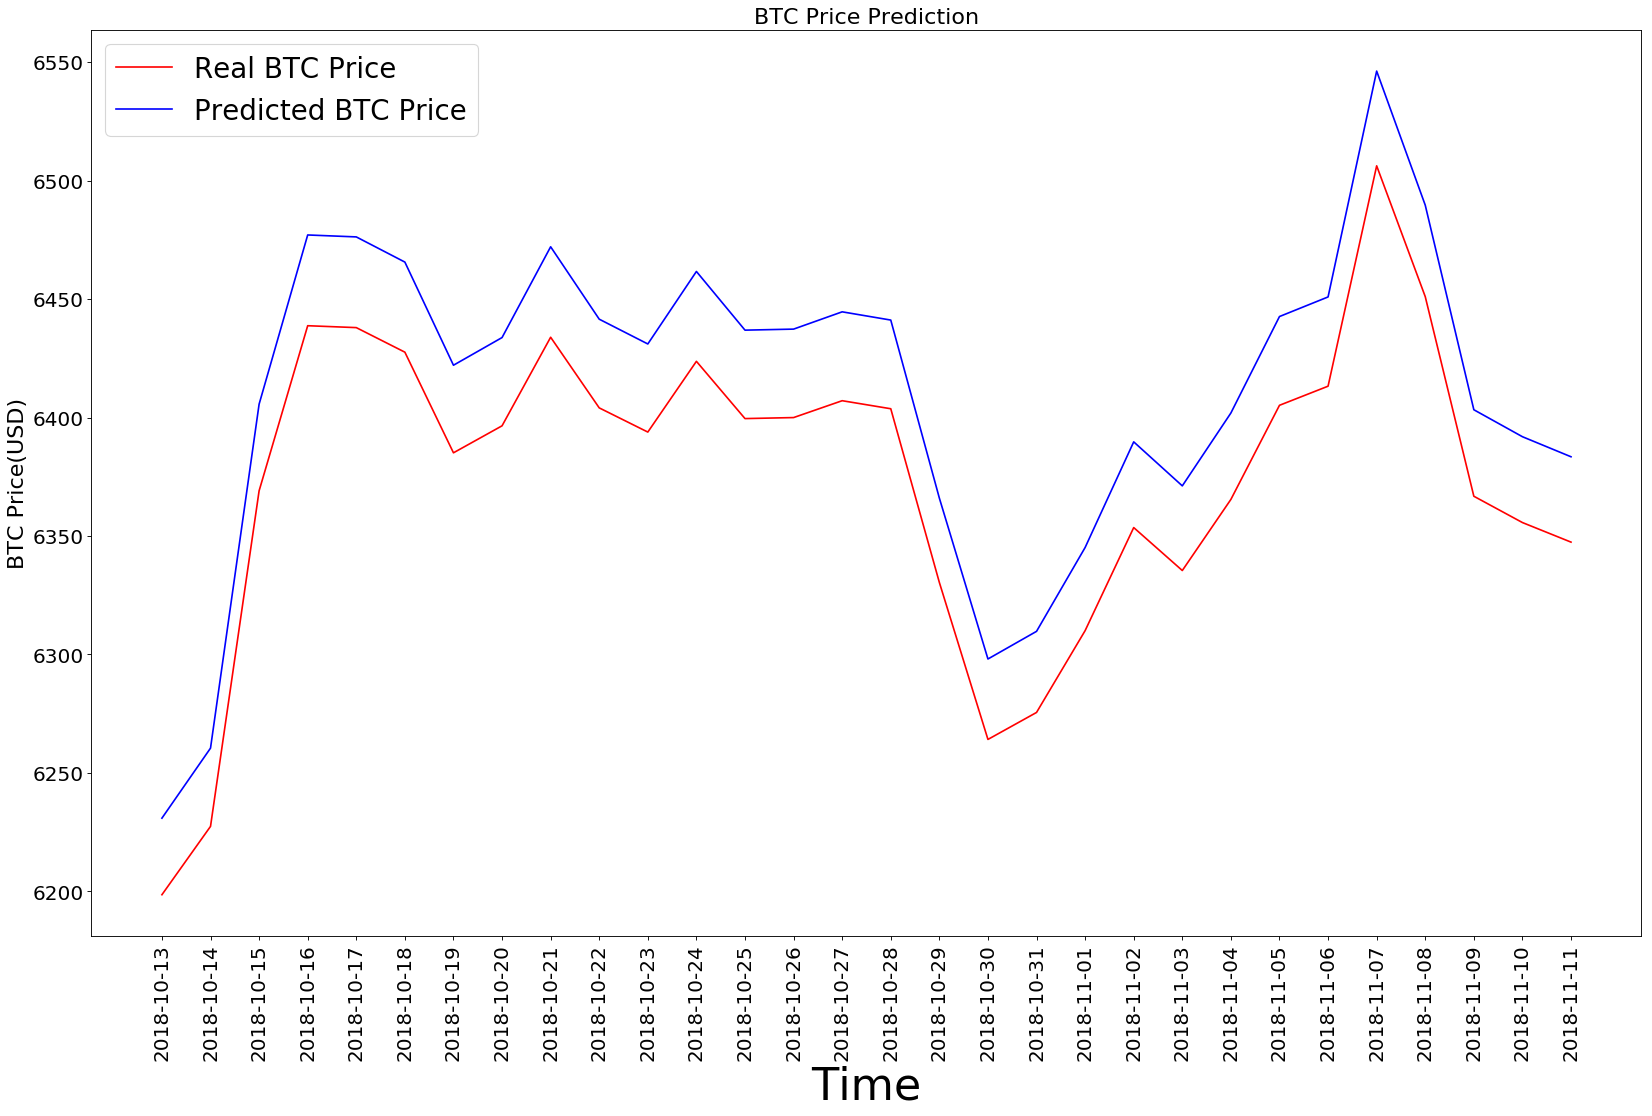

In [37]:
# Visualising the results
plt.figure(figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(test_set, color = 'red', label = 'Real BTC Price')
plt.plot(predicted_BTC_price, color = 'blue', label = 'Predicted BTC Price')
plt.title('BTC Price Prediction', fontsize=20)
df_test = df_test.reset_index()
x=df_test.index
labels = df_test['date']
plt.xticks(x, labels, rotation = 'vertical')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
plt.xlabel('Time', fontsize=40)
plt.ylabel('BTC Price(USD)', fontsize=20)
plt.legend(loc=2, prop={'size': 25})
plt.show()